<a href="https://colab.research.google.com/github/PUNEET29GARG/Movie-Ratings-Analysis/blob/main/Movie_Ratings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

In [3]:
# Reading u.data file containing movie ratings data.
df_data=pd.read_csv("/content/u.data")
df_data.head()

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [4]:
# In above cell we have used the default settings of the read_csv function,
# which assumes a comma-separated file with a header row.
# But
#df_data is "\t" seprated file, therefore we have to provide a seprator
df_Data=pd.read_csv("/content/u.data",header=None, sep="\t")

#Showing first 5 rows
df_Data.head()


,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
# we have to correct column names based on the description of the file..
df_Data.columns=["user id","item id","rating", "timestamp"]
df_Data

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
# Checking info
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
# Reading u.item  which contains movie information
# df_item=pd.read_csv("/content/u.item")
# df_item

In [9]:
# In previous cell utf-8' codec can't decode byte --- have to change encoder
#encoding='iso-8859-1'
df_item=pd.read_csv("/content/u.item",sep="|" ,header=None,encoding='iso-8859-1')
df_item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#changing column names based on the description of the file.
df_item.columns=["movie id","movie title","release date","video release date","IMDb URL","unknown","Action","Adventure","Animation",
              "Children's","Comedy", "Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
              "Thriller","War","Western"]

# First five rows of the data frame
df_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# df_item.info()

In [20]:
#changing released_date column to a datetime object, using the to_datetime function.
df_item["release date"]=pd.to_datetime(df_item["release date"], errors="coerce")
#checking dtype
df_item["release date"].dtype

dtype('<M8[ns]')

In [21]:
# Reading u.user which contains user information.
df_user=pd.read_csv("/content/u.user",header=None, sep="|")
df_user

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
# Renaming columns based on the description of the file.
df_user.columns=["user id","age","gender","occupation","zip code"]
df_user

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [22]:
# shows the information of the rating data frame
df_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


**Display univariate plots of the attributes: 'rating'**

In [ ]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='rating', ylabel='count'>

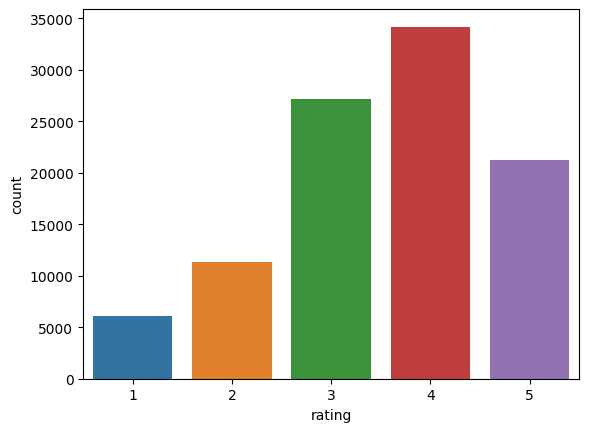

In [ ]:
# Plotting count plot of rating using the countplot function from seaborn.
sns.countplot(data=df_Data, x="rating" )

**The output shows a bar chart of the frequency of each rating value, from 1 to 5.**

OBSERVATION : Maximum times rating revolves around 4 and 3.

**Display univariate plots of the attributes: age**

<Axes: xlabel='age', ylabel='Count'>

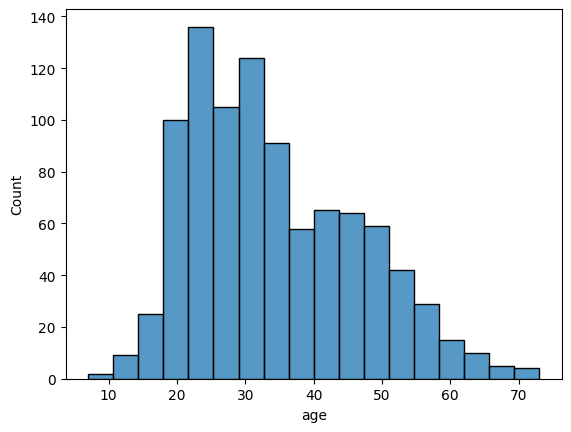

In [ ]:
#histogram for age column, using the histplot function from seaborn.
sns.histplot(data= df_user, x="age")

The output for the above plot shows a distribution of the age of the users, with bins of size 10.

**OBSERVATION :** Maximum users are young having age between 20 - 30.

Display univariate plots of the attributes: 'release date', 'gender' and
'occupation'

<Axes: xlabel='release date', ylabel='Count'>

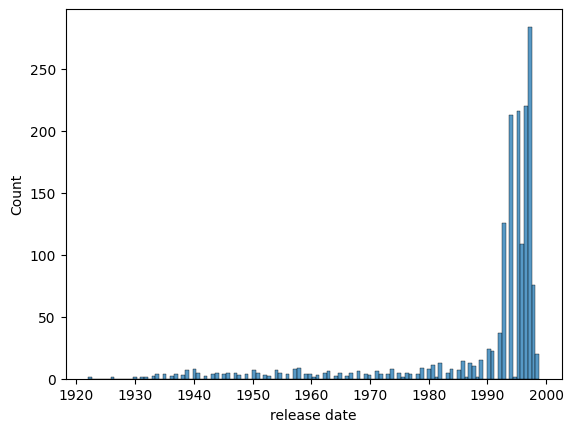

In [ ]:
#histogram for release date
sns.histplot(data=df_item, x="release date")

The output shows a distribution of the release date of the movies.

**OBSERVATION :** Maximum movies were released around 1995-1997.

<Axes: xlabel='gender', ylabel='count'>

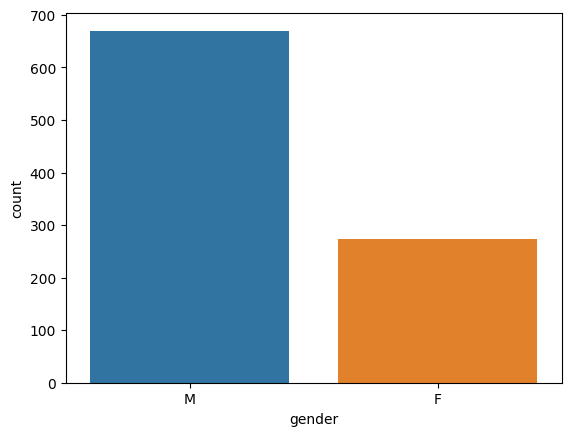

In [ ]:
#countplot for gender
sns.countplot(data=df_user, x="gender")

The output shows the bar chart of the frequency of each gender of the users.

**OBSERVATION :** Male user are significantly large in no. as compared to female users.

<Axes: xlabel='occupation', ylabel='count'>

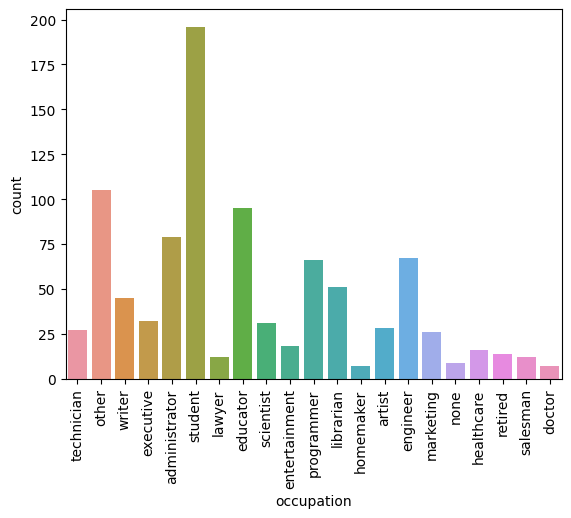

In [ ]:
##countplot for occupation

# The x-axis labels of the occupation plot are rotated by 90 degrees for readability.
plt.xticks(rotation=90)
sns.countplot(data=df_user, x="occupation")

Output shows a bar chart of the frequency of each occupation of the users.

**OBSERVATION :** Students contributes for the maximum users.

In [23]:
# Extracting the year from the release date column, using the dt.year attribute.
# It assigns the result to a new column named year.
df_item["year"] = df_item["release date"].dt.year
df_item

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998.0
1678,1679,B. Monkey (1998),1998-02-06,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998.0
1679,1680,Sliding Doors (1998),1998-01-01,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998.0
1680,1681,You So Crazy (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994.0


In [ ]:
#dropping some columns from the movie data frame, using the drop method. It keeps only the columns related to the genres of the movies.
df_genere=df_item.drop(["release date","video release date","IMDb URL","movie id","movie title"],axis=1)
df_genere

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998.0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998.0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998.0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994.0


**The output shows the first five rows of the data frame with the reduced columns.**

In [ ]:
# Grouping the data frame by the year column, using the groupby method.
df_genere=df_genere.groupby(by="year").sum()
df_genere

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1922.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995.0,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996.0,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


The output sums up the values of each genre column for each year, using the sum method. The output shows the first five rows of the grouped data frame with the aggregated values.

**Creating a scatter plot of the grouped data frame i.e. df_genere.**

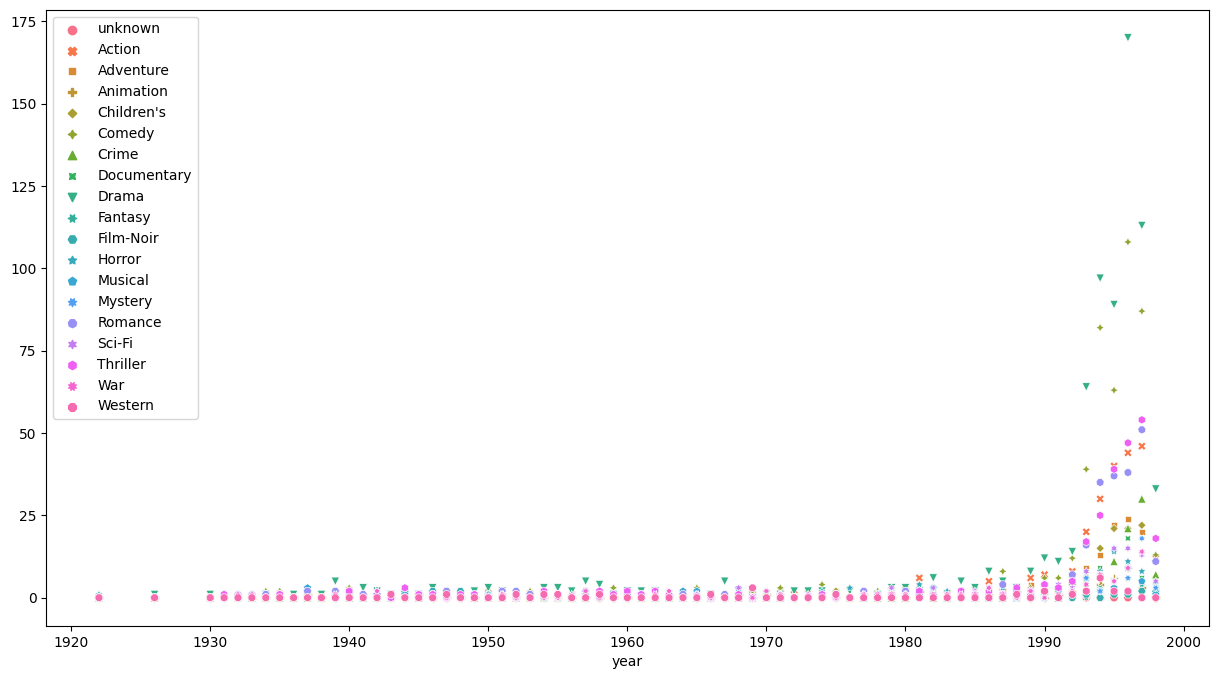

In [ ]:
# Creating a figure with a larger size, using the figure function from matplotlib.pyplot
#  It sets the width to 15 and the height to 8.
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_genere)
plt.show()



**The output shows a scatter plot of the number of movies of each genre for each year, with different colors for each genre.**

**Display the top 25 movies by average rating as a data frame.**
**Note:- Considering only the movies which received atleast a 100 ratings**

In [ ]:
#applying groupby
df_rating=df_Data.groupby("item id").agg({"user id":"count","rating":"mean"})
df_rating

,user id,rating
item id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
...,...,...
1678,1,1.000000
1679,1,3.000000
1680,1,2.000000


In [ ]:
#modifying data to have user id count >100 only
df_rating=df_rating[df_rating["user id"]>100]
df_rating

,user id,rating
item id,,
1,452,3.878319
2,131,3.206107
4,209,3.550239
7,392,3.798469
8,219,3.995434
...,...,...
926,101,2.702970
928,104,3.115385
1016,137,3.459854


In [ ]:
# The top 25 movies by average rating
# Joining the movie and rating data frames, using the join method.
a=df_item.set_index("movie id").join(df_rating,how="inner")
a[["movie title","rating"]].sort_values(by=["rating"],ascending=False).head(25)

,movie title,rating
408,"Close Shave, A (1995)",4.491071
318,Schindler's List (1993),4.466443
169,"Wrong Trousers, The (1993)",4.466102
483,Casablanca (1942),4.456790
64,"Shawshank Redemption, The (1994)",4.445230
603,Rear Window (1954),4.387560
12,"Usual Suspects, The (1995)",4.385768
50,Star Wars (1977),4.358491
178,12 Angry Men (1957),4.344000
134,Citizen Kane (1941),4.292929


**OBSERVATION :**
The above output sorts the data frame by the rating column in descending order, using the sort_values method.It selects the movie title and rating columns, using the indexing operator. It shows the first 25 rows of the data frame, using the head method.

 **Verify the following statements :**<br>
o Men watch more drama than women<br>
o Men watch more Romance than women<br>
o Women watch more Sci-Fi than men<br>

In [ ]:
# Doing a join for the movie and user data frames.
x=df_item.set_index("movie id").join(df_user,how="inner")
x.head()

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Sci-Fi,Thriller,War,Western,year,user id,age,gender,occupation,zip code
1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,1995,2,53,F,other,94043
2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,1,0,0,1995,3,23,M,writer,32067
3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,1,0,0,1995,4,24,M,technician,43537
4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,1995,5,33,F,other,15213
5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,1,0,0,1995,6,42,M,executive,98101


**Filtering the data frame to keep only the columns related to the genres and gender using the indexing operator.**

In [ ]:
x=x[["Drama", "Romance", "Sci-Fi", "gender"]]
x.head()

,Drama,Romance,Sci-Fi,gender
1,0,0,0,F
2,0,0,0,M
3,0,0,0,M
4,1,0,0,F
5,1,0,0,M


In [ ]:
# Filtering data where these genres exists.
x[(x['Drama'] == 1) | (x['Romance'] == 1) | (x['Sci-Fi'] == 1)]

,Drama,Romance,Sci-Fi,gender
4,1,0,0,F
5,1,0,0,M
6,1,0,0,M
7,1,0,1,M
8,1,0,0,M
...,...,...,...,...
937,1,0,0,F
938,0,1,0,F
939,1,0,0,M
941,1,0,0,F


**Shows the frequency of each gender for each genre, using the groupby and value_counts methods.**

In [ ]:
x.groupby(["Drama"]).gender.value_counts()

# men watch more Drama

Drama  gender
0      M         417
       F         161
1      M         252
       F         112
Name: gender, dtype: int64

In [ ]:
x.groupby(["Romance"]).gender.value_counts()
# men watch more romance

Romance  gender
0        M         559
         F         227
1        M         110
         F          46
Name: gender, dtype: int64

In [ ]:
x.groupby(["Sci-Fi"]).gender.value_counts()
#men watch more Sci-Fi

Sci-Fi  gender
0       M         608
        F         249
1       M          61
        F          24
Name: gender, dtype: int64

**OBSERVATION **

**The output shows that men watch more drama, romance, and sci-fi than women.**